# US Visa Prediction Project

**Life cycle of Machine learning Project**

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model


### About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).


## 1) Problem statement.

- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.
- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project i'm going to use the data given to build a Classification model:**

- This model is to check if Visa get approved or not based on the given dataset.
- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.


## 2) Data Collection.

- The Dataset is part of Office of Foreign Labor Certification (OFLC)
- The data consists of 25480 Rows and 12 Columns

https://www.kaggle.com/datasets/moro23/easyvisa-dataset


### 2.1 Import Data and Required Packages


**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import logging

warnings.filterwarnings("ignore")
# Set matplotlib's logging level to WARNING or ERROR to suppress DEBUG messages
logging.getLogger('matplotlib').setLevel(logging.WARNING)
%matplotlib inline

# Set display options for better readability
pd.set_option('display.max_columns', None)  # Display all columns
# pd.set_option('display.max_rows', 50)      # Display up to 50 rows
pd.set_option('display.width', 1000)        # Set width to prevent wrapping
pd.set_option('display.max_colwidth', 150)  # Show full width of columns


**Importing module as package**


In [2]:
# Import all strategy classes from basic_data_inspection
from analysis_src.basic_data_inspection import *

In [3]:
# Load the data
# Assuming you have already extracted the data into the 'extracted_data' folder

data_path = '../us_visa/data/extracted_data/EasyVisa.csv'
df = pd.read_csv(data_path)

**Initialize the object for DataInspector Class**


In [4]:
# Initialize the instance object for DataInspector class
data_inspector = DataInspector()

**Head of dataset**


In [5]:
data_inspector.execute_inspection(HeadInspection, df)


Default First 5 rows
  case_id continent education_of_employee has_job_experience requires_job_training  no_of_employees  yr_of_estab region_of_employment  prevailing_wage unit_of_wage full_time_position case_status
0  EZYV01      Asia           High School                  N                     N            14513         2007                 West         592.2029         Hour                  Y      Denied
1  EZYV02      Asia              Master's                  Y                     N             2412         2002            Northeast       83425.6500         Year                  Y   Certified
2  EZYV03      Asia            Bachelor's                  N                     Y            44444         2008                 West      122996.8600         Year                  Y      Denied
3  EZYV04      Asia            Bachelor's                  N                     N               98         1897                 West       83434.0300         Year                  Y      Denied
4  

**Tail of dataset**


In [6]:
data_inspector.execute_inspection(TailInspection, df)


Default Last 5 rows
         case_id continent education_of_employee has_job_experience requires_job_training  no_of_employees  yr_of_estab region_of_employment  prevailing_wage unit_of_wage full_time_position case_status
25475  EZYV25476      Asia            Bachelor's                  Y                     Y             2601         2008                South         77092.57         Year                  Y   Certified
25476  EZYV25477      Asia           High School                  Y                     N             3274         2006            Northeast        279174.79         Year                  Y   Certified
25477  EZYV25478      Asia              Master's                  Y                     N             1121         1910                South        146298.85         Year                  N   Certified
25478  EZYV25479      Asia              Master's                  Y                     Y             1918         1887                 West         86154.77         Year 

**Shape of datasets**


In [7]:
data_inspector.execute_inspection(ShapeInspection, df)


Rows and Columns in dataset
(25480, 12)


**DataTypes in dataset**


In [8]:
data_inspector.execute_inspection(DataTypesInspection, df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
None


**Summary of dataset**


In [9]:
data_inspector.execute_inspection(SummaryStatisticsInspection, df)


Summary Statistics (Numerical Features):
       no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.043210   1979.409929     74455.814592
std       22877.928848     42.366929     52815.942327
min         -26.000000   1800.000000         2.136700
25%        1022.000000   1976.000000     34015.480000
50%        2109.000000   1997.000000     70308.210000
75%        3504.000000   2005.000000    107735.512500
max      602069.000000   2016.000000    319210.270000

Summary Statistics (Categorical Features):
       case_id continent education_of_employee has_job_experience requires_job_training region_of_employment unit_of_wage full_time_position case_status
count    25480     25480                 25480              25480                 25480                25480        25480              25480       25480
unique   25480         6                     4                  2                     2                    5            4 

**Numerical Feature in dataset**


In [10]:
numerical_features = data_inspector.execute_inspection(NumericalFeatureInspection, df)

This dataset has 3 Numerical Features and they are : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


**Numerical Feature in dataset**


In [11]:
categorical_features = data_inspector.execute_inspection(CategoricalFeatureInspection, df)

This dataset has 9 Categorical Features and they are : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


**Proportion of data on categorical feature**


In [12]:
data_inspector.execute_inspection(ProportionFeatureInspection, df)

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
-------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-------------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-------------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64

**Value Count of data on categorical feature**


In [13]:
data_inspector.execute_inspection(ValueCountFeatureInspection, df)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
-------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
-------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
-------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
-------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
-------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count,

**Check Null Value**


In [14]:
data_inspector.execute_inspection(IsNullFeatureInspection, df)


Number of Null Values in each feature:
case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


**Check duplicated value**


In [15]:
data_inspector.execute_inspection(DuplicatedFeatureInspection, df)


Summary of Duplicated Values in each feature:
0


**Number of Unique value in each column**


In [16]:
data_inspector.execute_inspection(NuUniqueValueInspection, df)


Number of Unique Values in each colunm:
case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64


**Display all Unique value of feature**


In [17]:
data_inspector.execute_inspection(DisplayUniqueCatValueInspection, df)


Unique Values in each colunm:
case_id                  [EZYV01, EZYV02, EZYV03, EZYV04, EZYV05, EZYV06, EZYV07, EZYV08, EZYV09, EZYV10, EZYV11, EZYV12, EZYV13, EZYV14, EZYV15, EZYV16, EZYV17, EZYV18, E...
continent                                                                                                        [Asia, Africa, North America, Europe, South America, Oceania]
education_of_employee                                                                                                           [High School, Master's, Bachelor's, Doctorate]
has_job_experience                                                                                                                                                      [N, Y]
requires_job_training                                                                                                                                                   [N, Y]
no_of_employees          [14513, 2412, 44444, 98, 1082, 2339, 4985, 3035, 4810, 2251, 2465, 40

**Analysis for Missing Values**



Missing Values Count by Column:


Series([], dtype: int64)

Visualizing Missing Values...


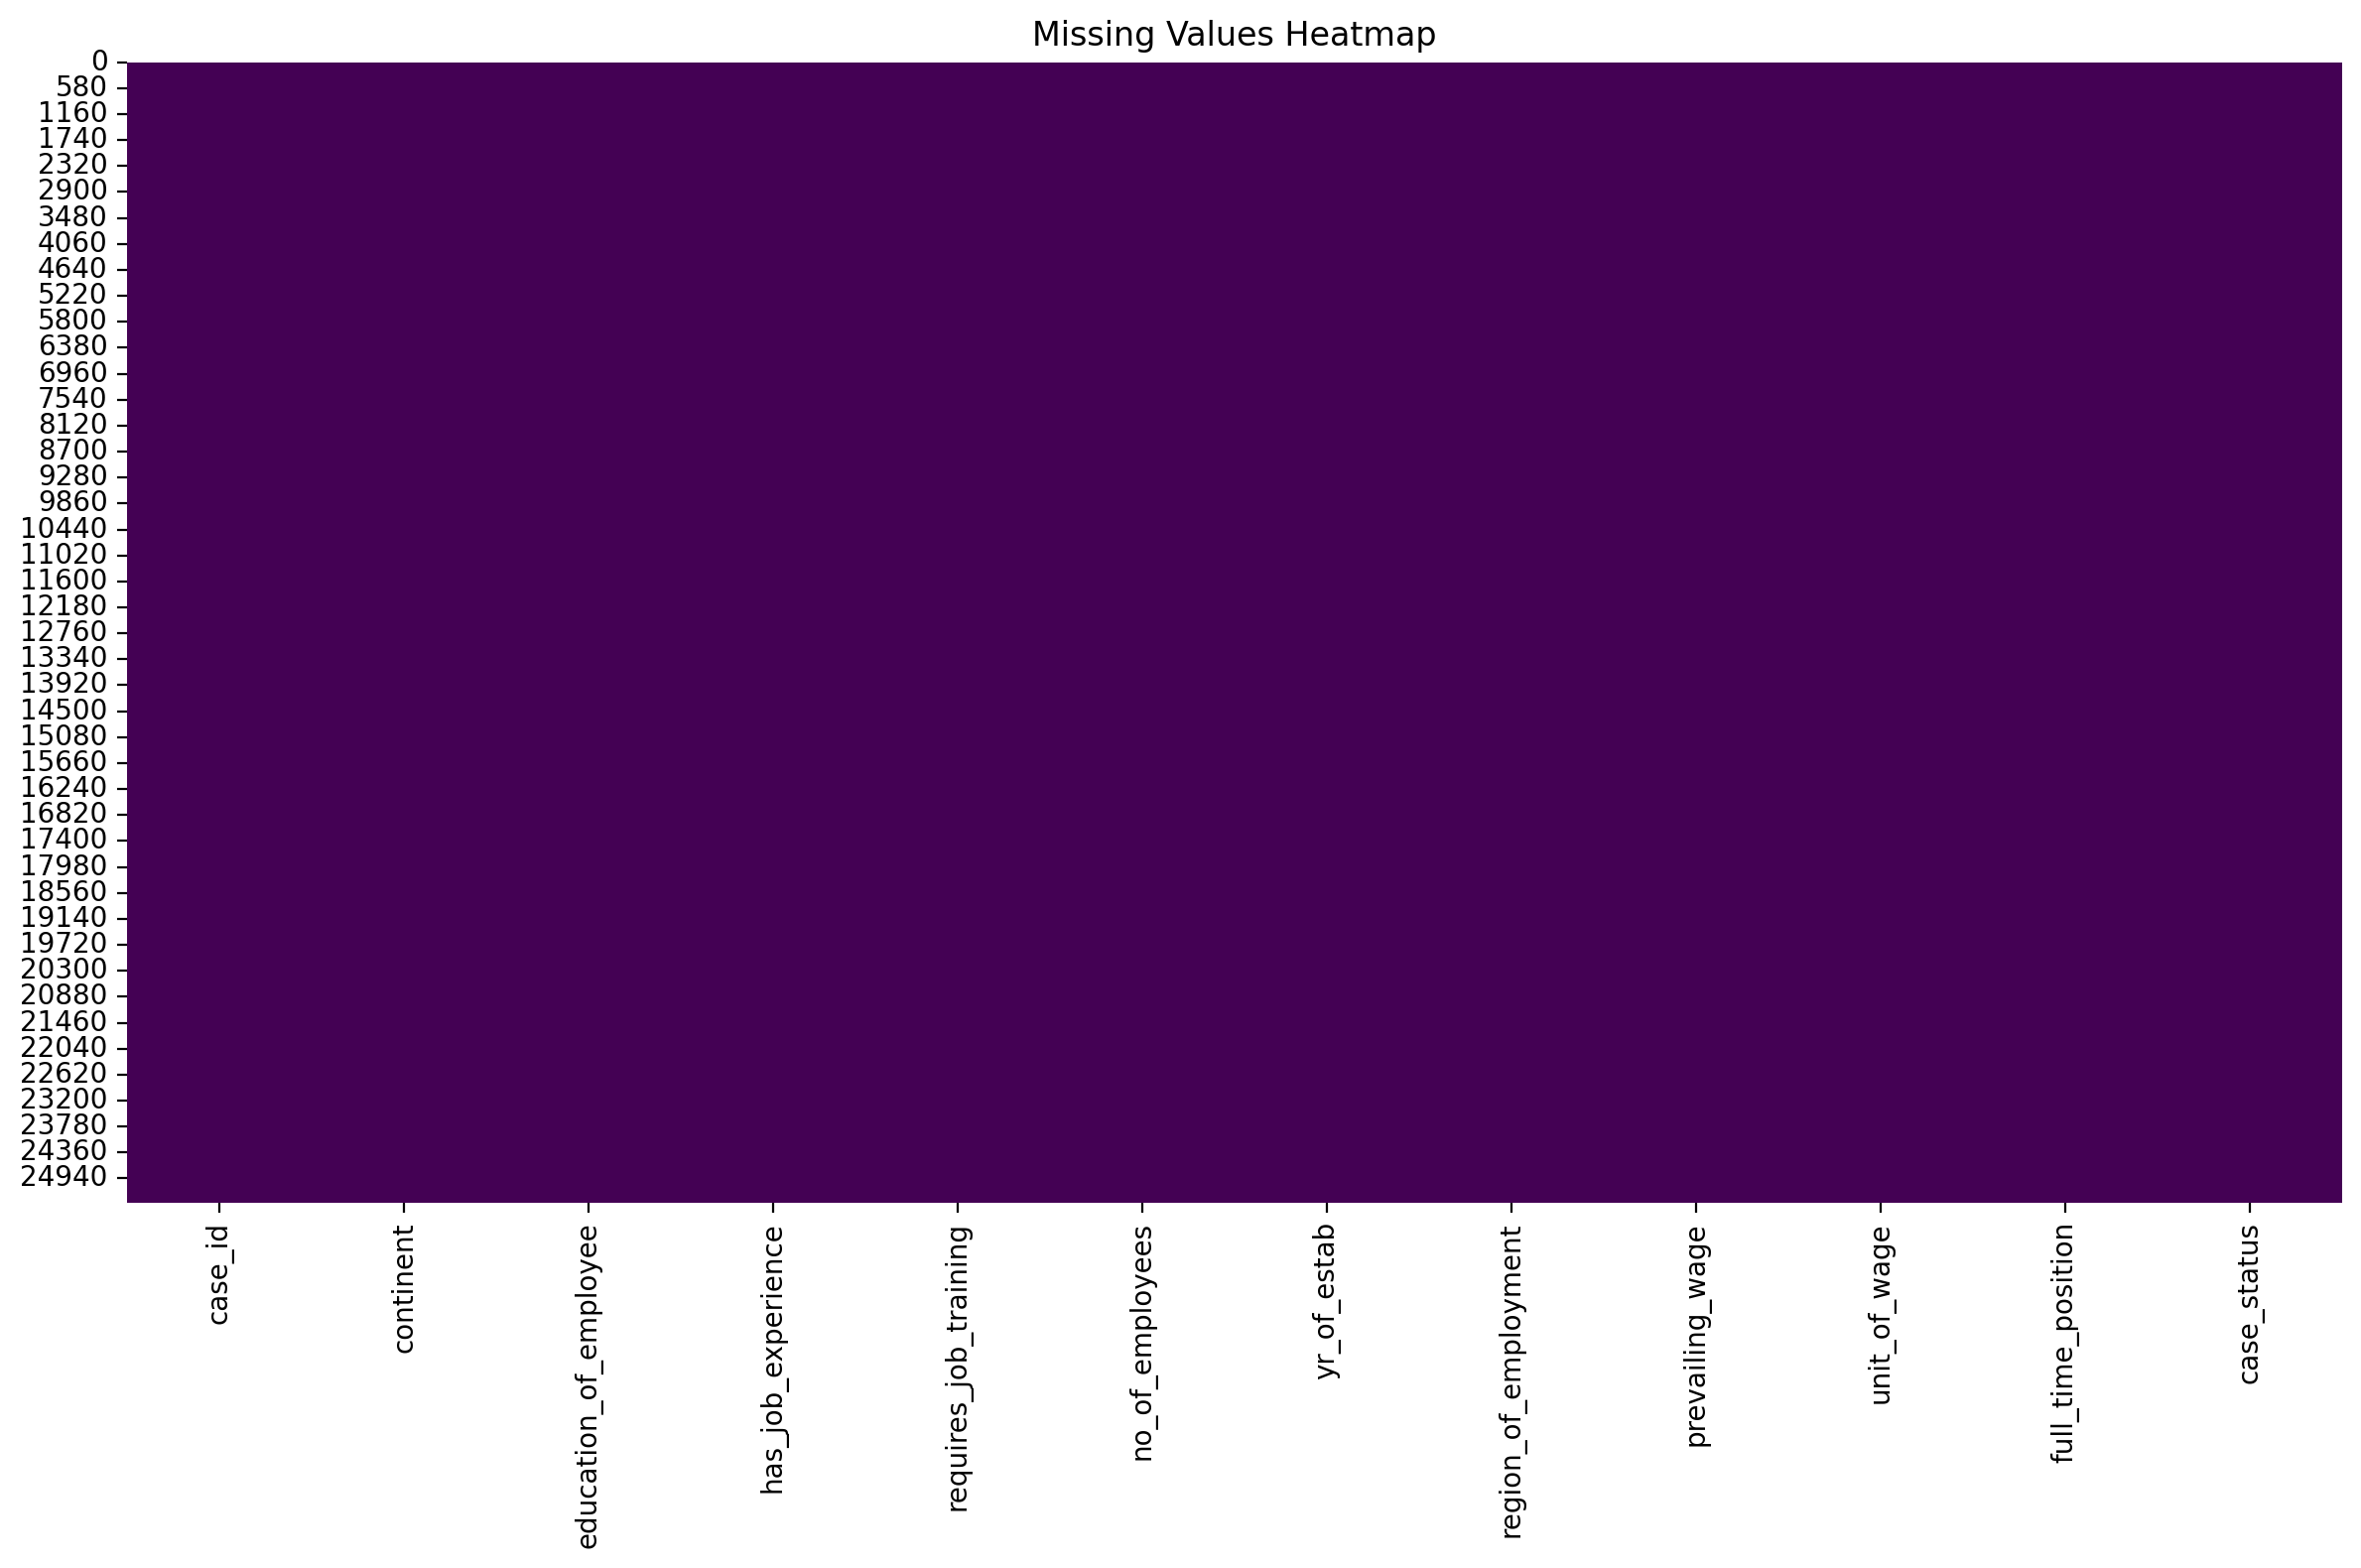

In [18]:
# Perform Missing Values Analysis
from analysis_src.missing_value_analysis import SimpleMissingValuesAnalysis

missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

**Features:**

- case_id: ID of each visa application
- continent: Information of continent the employee
- education_of_employee: Information of education of the employee
- has_job_experience: Does the employee has any job experience? Y= Yes; N = No
- requires_job_training: Does the employee require any job training? Y = Yes; N = No
- no_of_employees: Number of employees in the employer's company
- yr_of_estab: Year in which the employer's company was established
- region_of_employment: Information of foreign worker's intended region of employment in the US.
- prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
- unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
- full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
- case_status: Flag indicating if the Visa was certified or denied


#### Insights

**Rows and Columns in Dataset:**

- The dataset contains 25,480 rows and 12 columns, indicating a sizable dataset for analysis with diverse feature categories.

**Data Types and Non-null Counts:**

- All columns contain non-null data across 12 fields, with `9` categorical features `(e.g., continent, case_status)` and `3` numeric features `(no_of_employees, yr_of_estab, prevailing_wage)`. This ensures no missing values, facilitating smooth analysis.

**Summary Statistics (Numerical Features):**

- The dataset's numerical features show that the average number of employees is 5,667, and the average establishment year is around 1979.
- The prevailing_wage has a wide range, with the highest wage reaching over 300,000. Some potential outliers (negative values in no_of_employees and unusually early establishment years) may need addressing.

**Proportion Distributions (Selected Categorical Features):**

- `continent:` Asia dominates at 66%, with other continents making up smaller proportions.
- `education_of_employee:` "Bachelor's" (40%) and "Master's" (38%) represent the majority, while "Doctorate" and "High School" are less common.
- `has_job_experience:` 58% of applicants have prior job experience.
- `requires_job_training:` Only 11.6% of cases require job training.
- `region_of_employment:` The Northeast region has the highest employment proportion (28.2%), followed closely by South (27.53%) and West (25.84%).
- `unit_of_wage:` Wages are mostly given per year (90%), followed by per hour (8%). Hence, most of them are yearly contracts.
- `full_time_position:` Nearly 90% of cases are full-time roles.
- `case_status:` "Certified" makes up 66.8% of cases, indicating a high acceptance rate.


**Missing Values Heatmap Insights**

**1. Colors Represent Missingness:**

- **Yellow**: Represents missing values. The more yellow you see in a column, the more missing data is present in that particular feature.
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple indicate that most of the data is present for that feature.

**2. Identifying Columns with Missing Data:**

**3. Understanding the Distribution of Missing Data:**

- **Randomly Distributed**:

- **Structured Missingness**:

**4. Assessing the Severity:**

- There is not a single missing value in dataset


### Univariant Analysis

- The term univariant analysis refers to the analysis of one variable prefix "uni" means "one". The purpose of univariant analysis is to understand the distribution of values for a single variable.

**Other Type of Analysis are:**

- `Bivariant Analysis:` The Analysis of two variable.
- `Multivariate Analysis:` The Analysis of two or more variable.


##### Numerical Feature:


In [19]:
# Import Context Class that uses a UnivariateAnalysisStrategy
from analysis_src.univariate_analysis import UnivariateAnalyzer

univariant_analyzer = UnivariateAnalyzer()


In [20]:
print(numerical_features)
print(categorical_features)

['no_of_employees', 'yr_of_estab', 'prevailing_wage']
['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


**Univariate Analysis of Numerical Features**


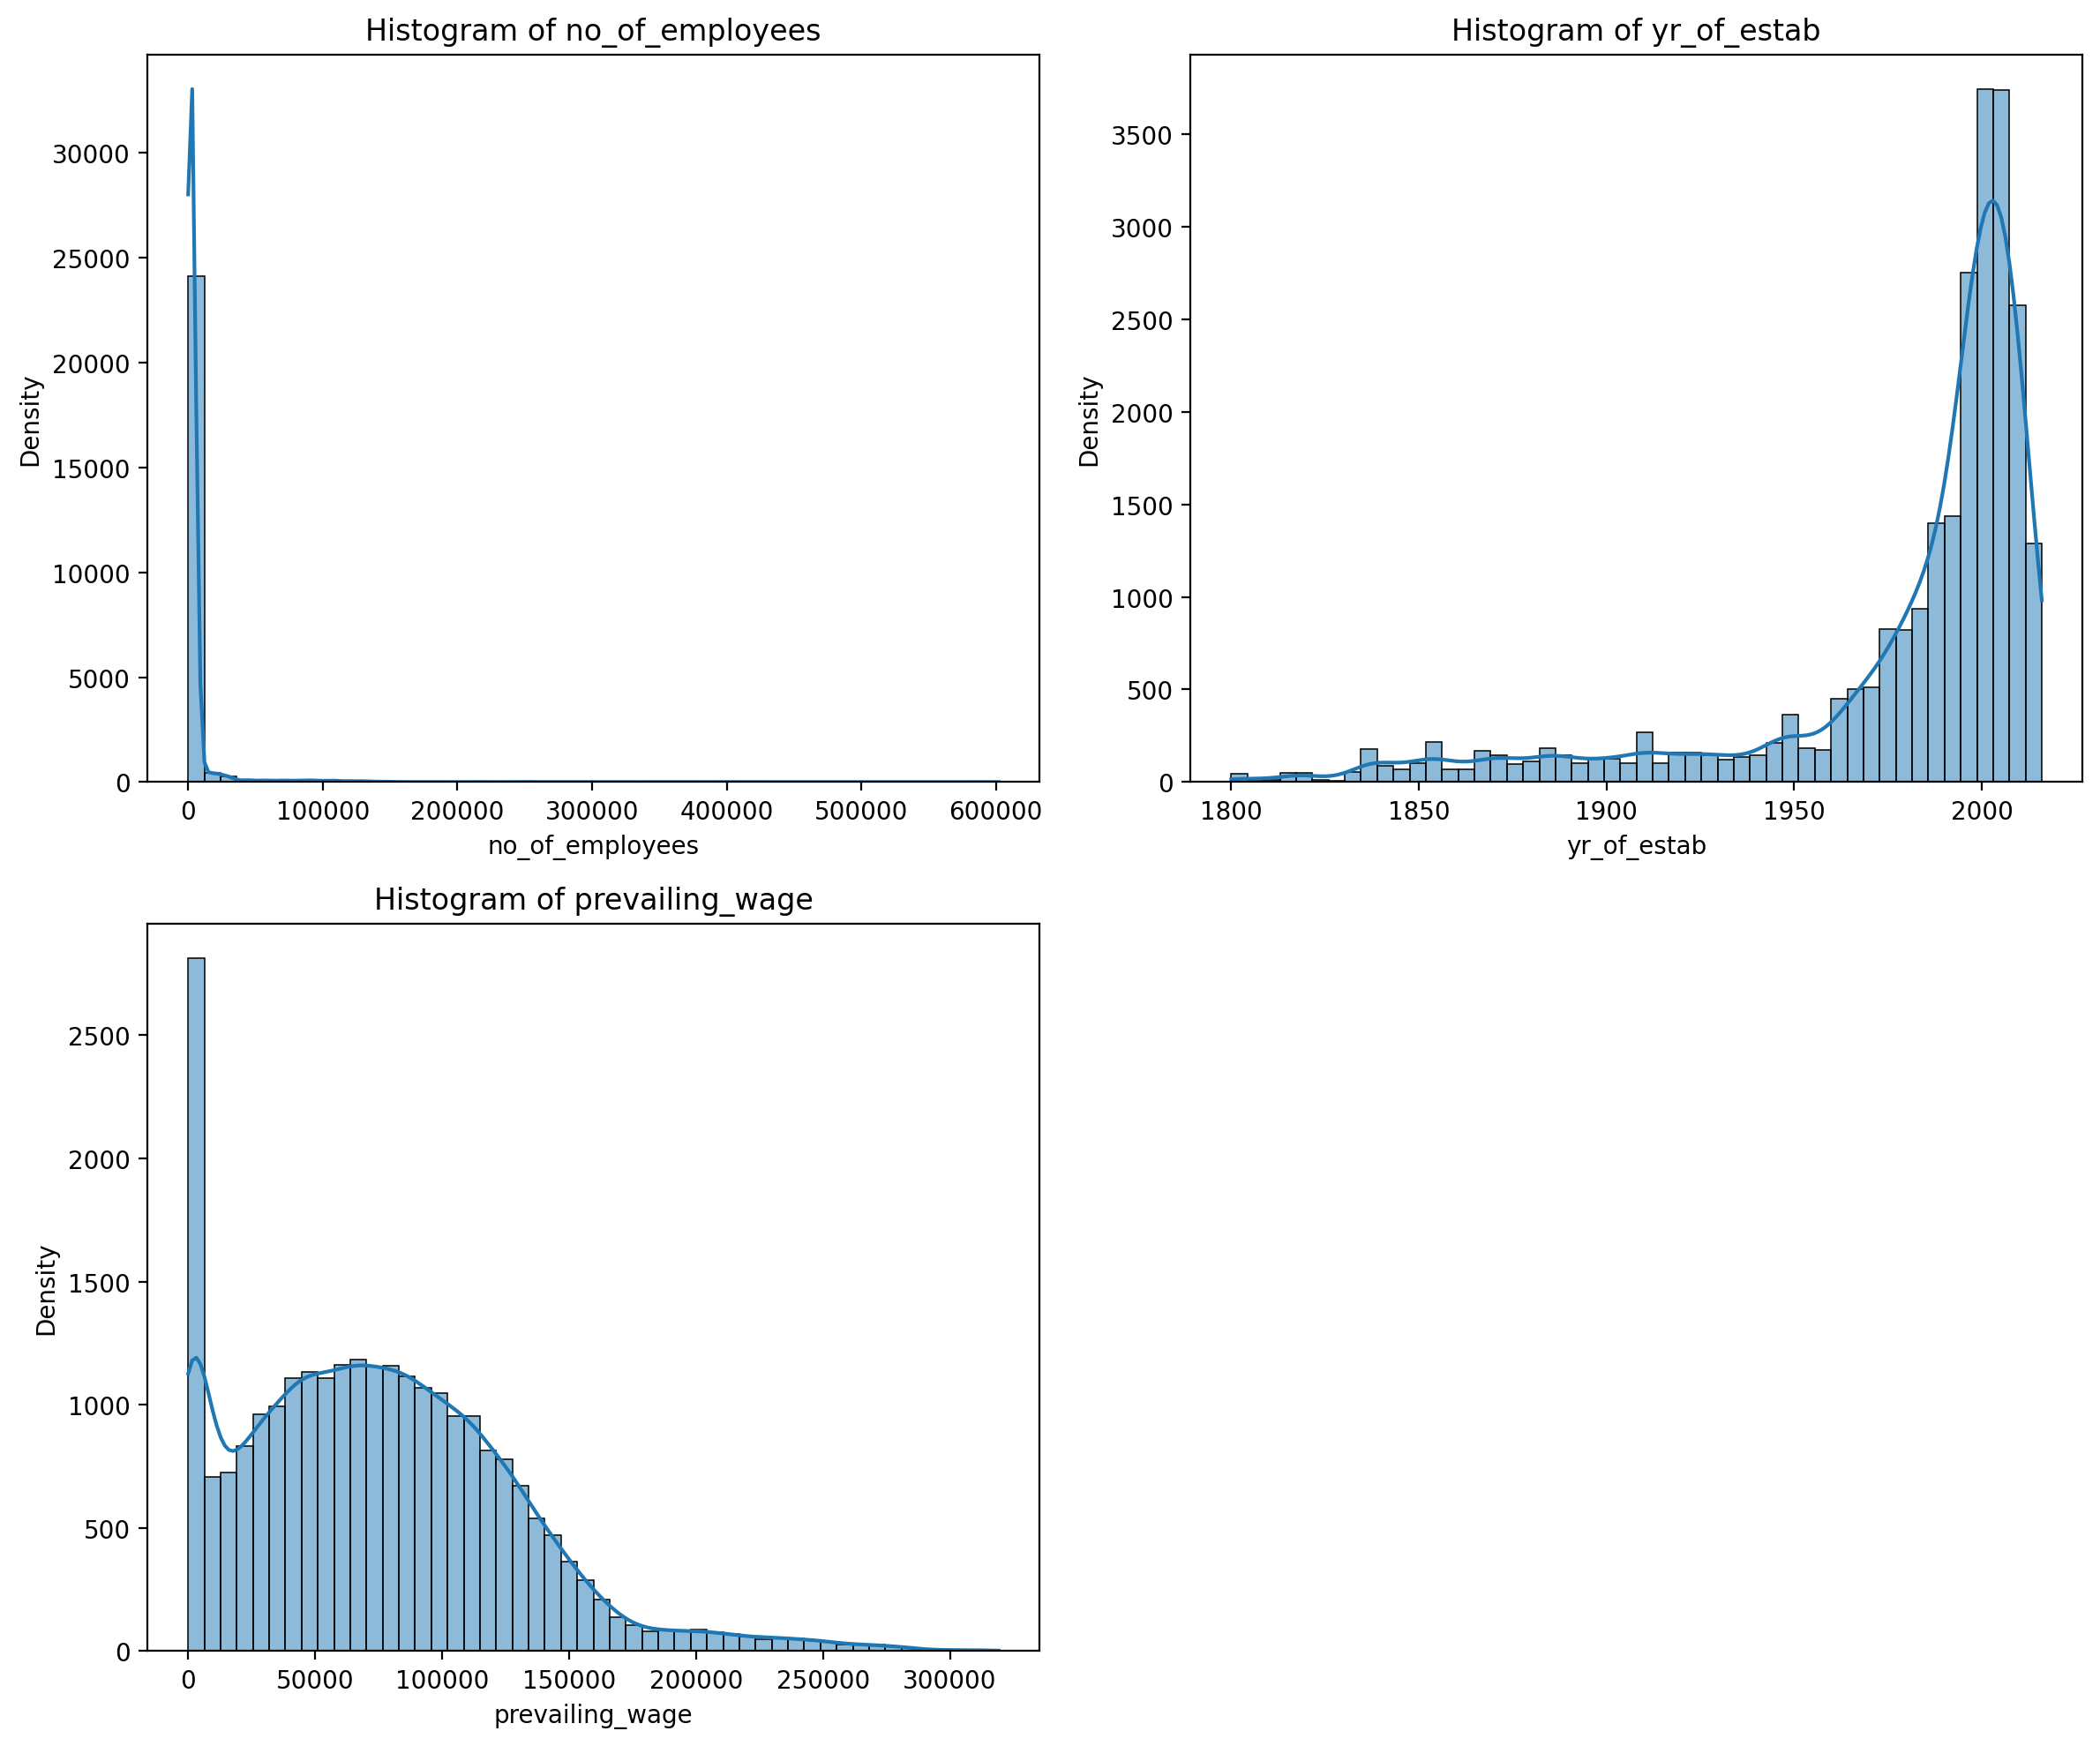

In [21]:
# Univariant Analysis on Numerical Features
# -----------------------------------------
univariant_analyzer.execute_analysis(df, features=numerical_features, n_cols=2, plot_type='histogram')

**Insights**

- no_of_employees column looks more right skewed but it may be because of outlies.
- yr_of_estab is a discrete feature.
- privailing-wage is a right-skewed distribution.


**Univariate Analysis of Categorical Features**


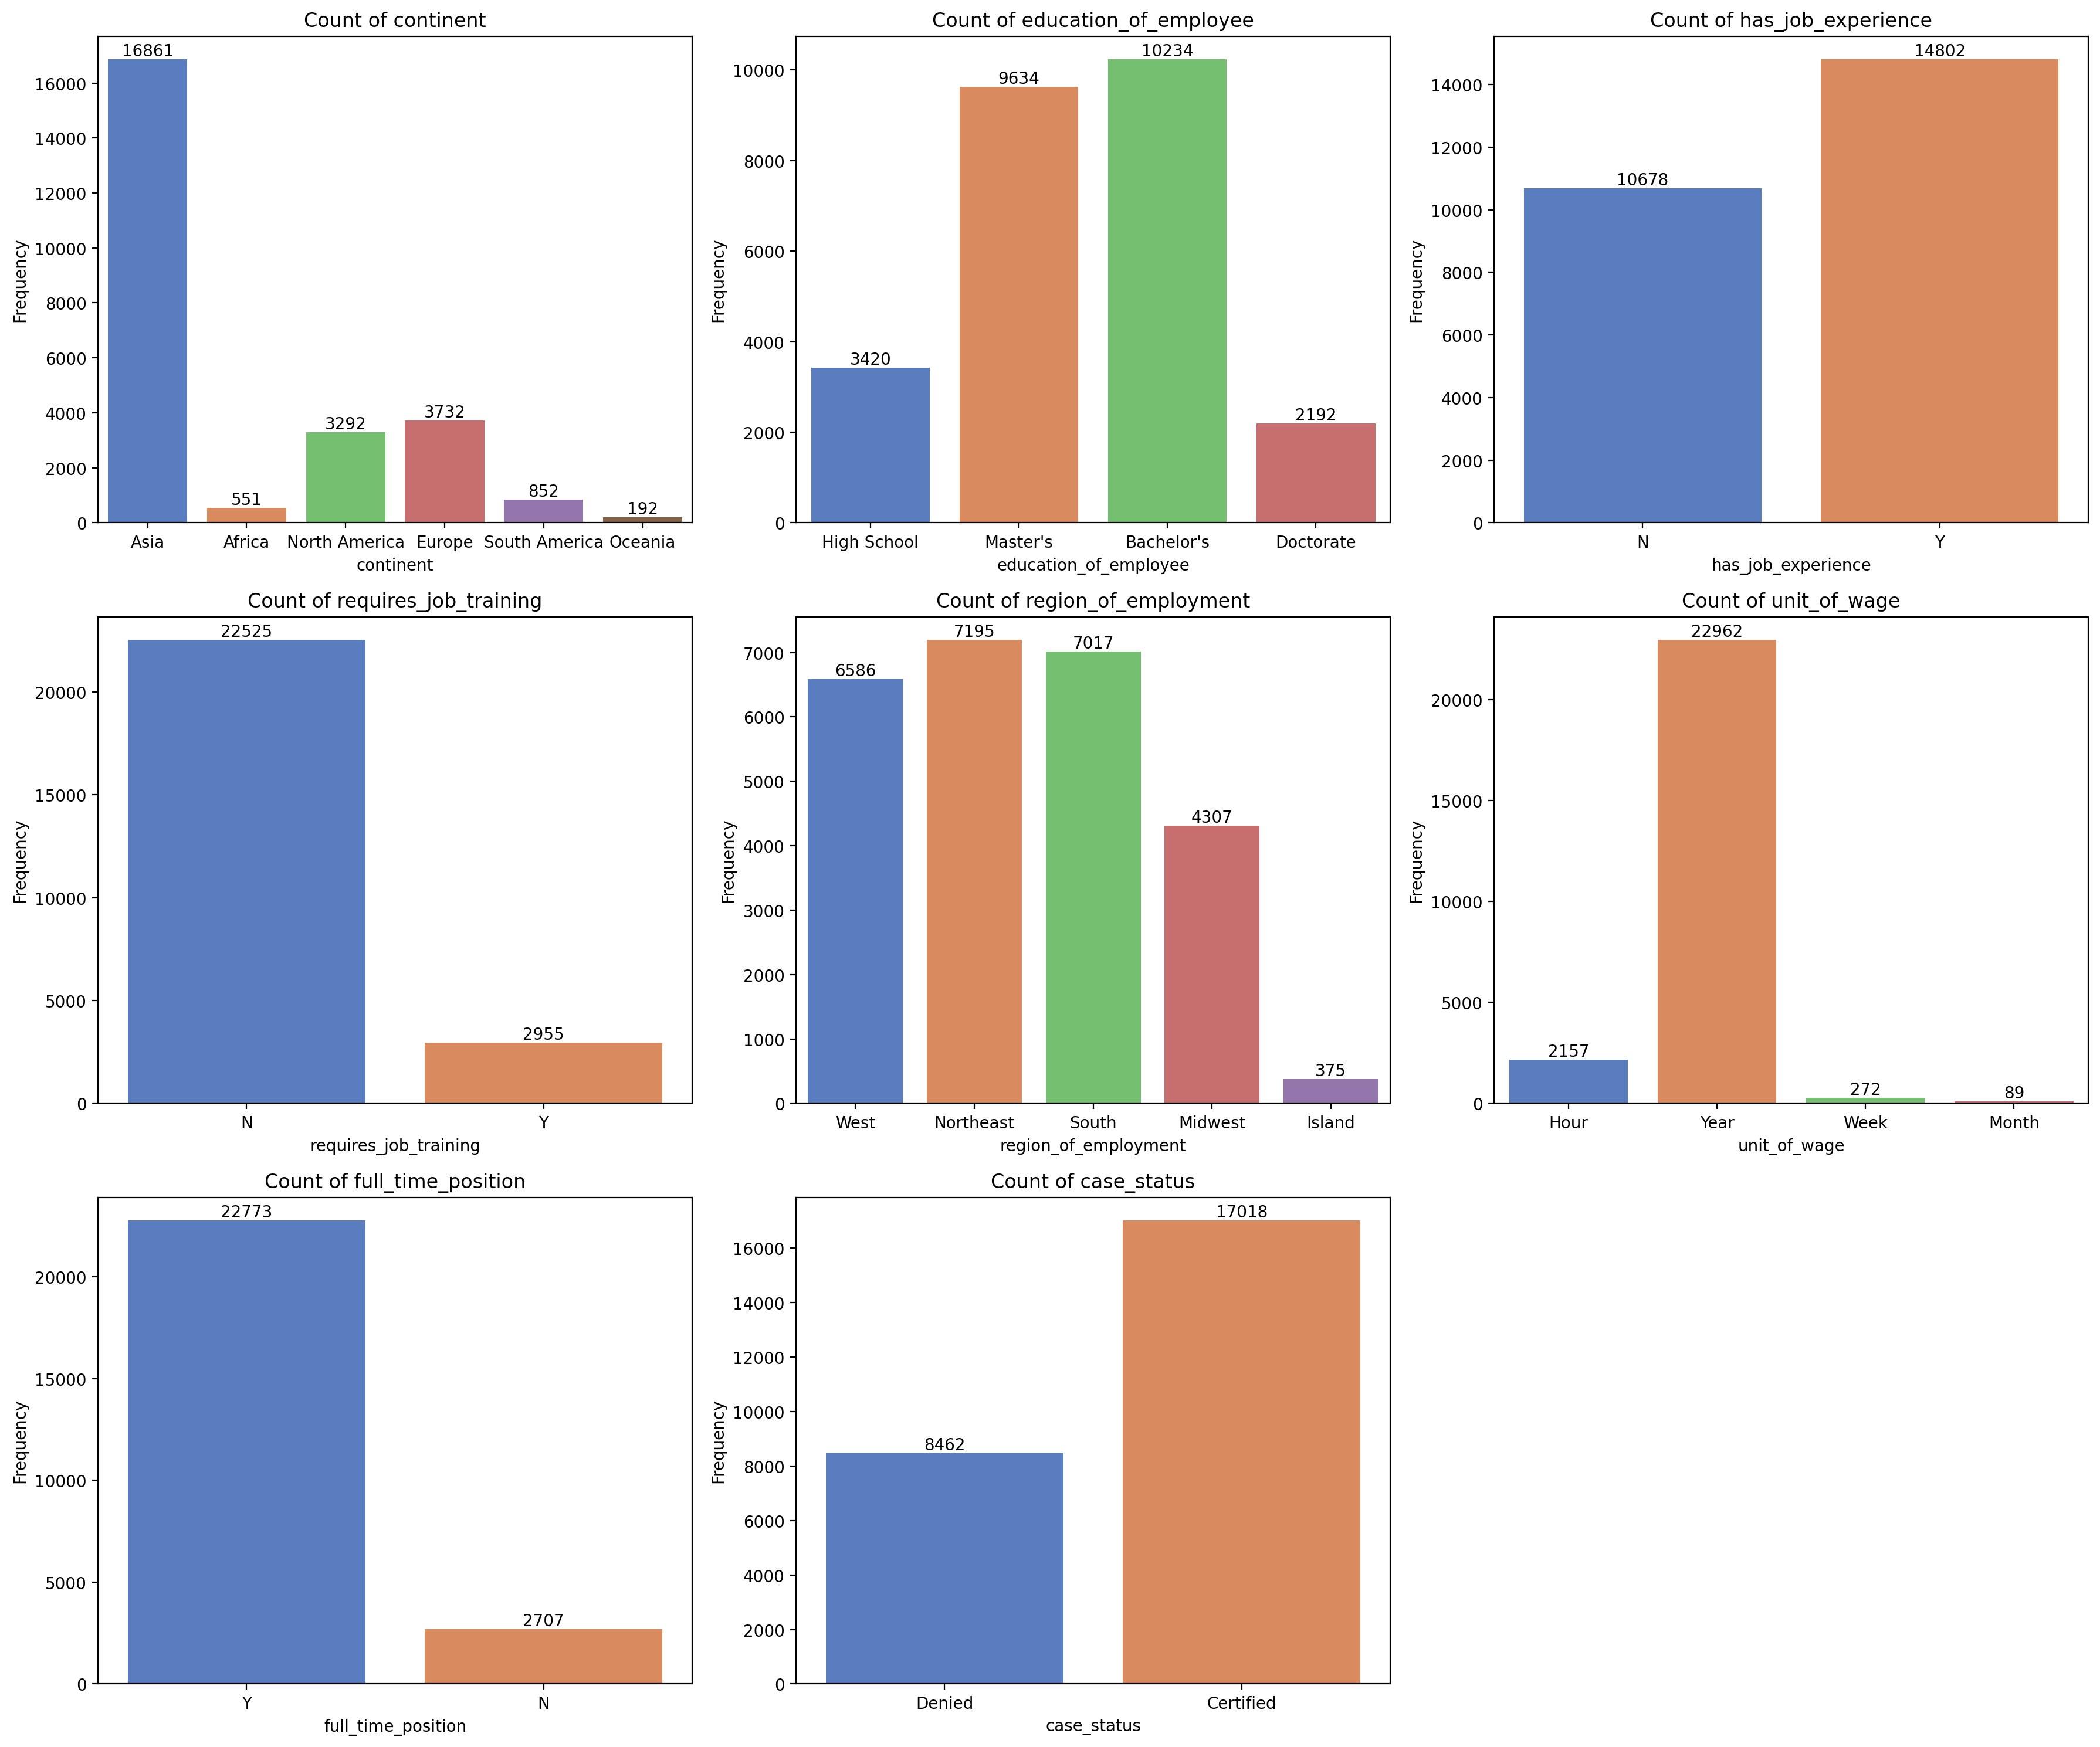

In [22]:
# Univariant Analysis on Categorical Features
# -----------------------------------------

categorical_features = [feature for feature in categorical_features if feature != 'case_id']
univariant_analyzer.execute_analysis(df, features=categorical_features, n_cols=3, plot_type='count')

**Insights**

- `requires_job_training`, `unit_of_wage`, `full_time_position`, `case_status` and `continents` coulmns have signle category dominating.
- In rest of the columns are balanced.


### Bivariant Analysis

**The Analysis of two variable.**


In [23]:
discrete_features = data_inspector.execute_inspection(DiscreteNumericalFeature, df)
continuous_feature = data_inspector.execute_inspection(ContinuousNumericalFeature, df)


We have 0 discrete feature : []
We have 3 continuous feature : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


**Distribution of Numerical Features By Case Status**


In [24]:
# Initialize BivariateAnalyzer
from analysis_src.bivariate_analysis import BivariateAnalyzer, MultiPlotBivariateAnalysis

bivariate_analyzer = BivariateAnalyzer()

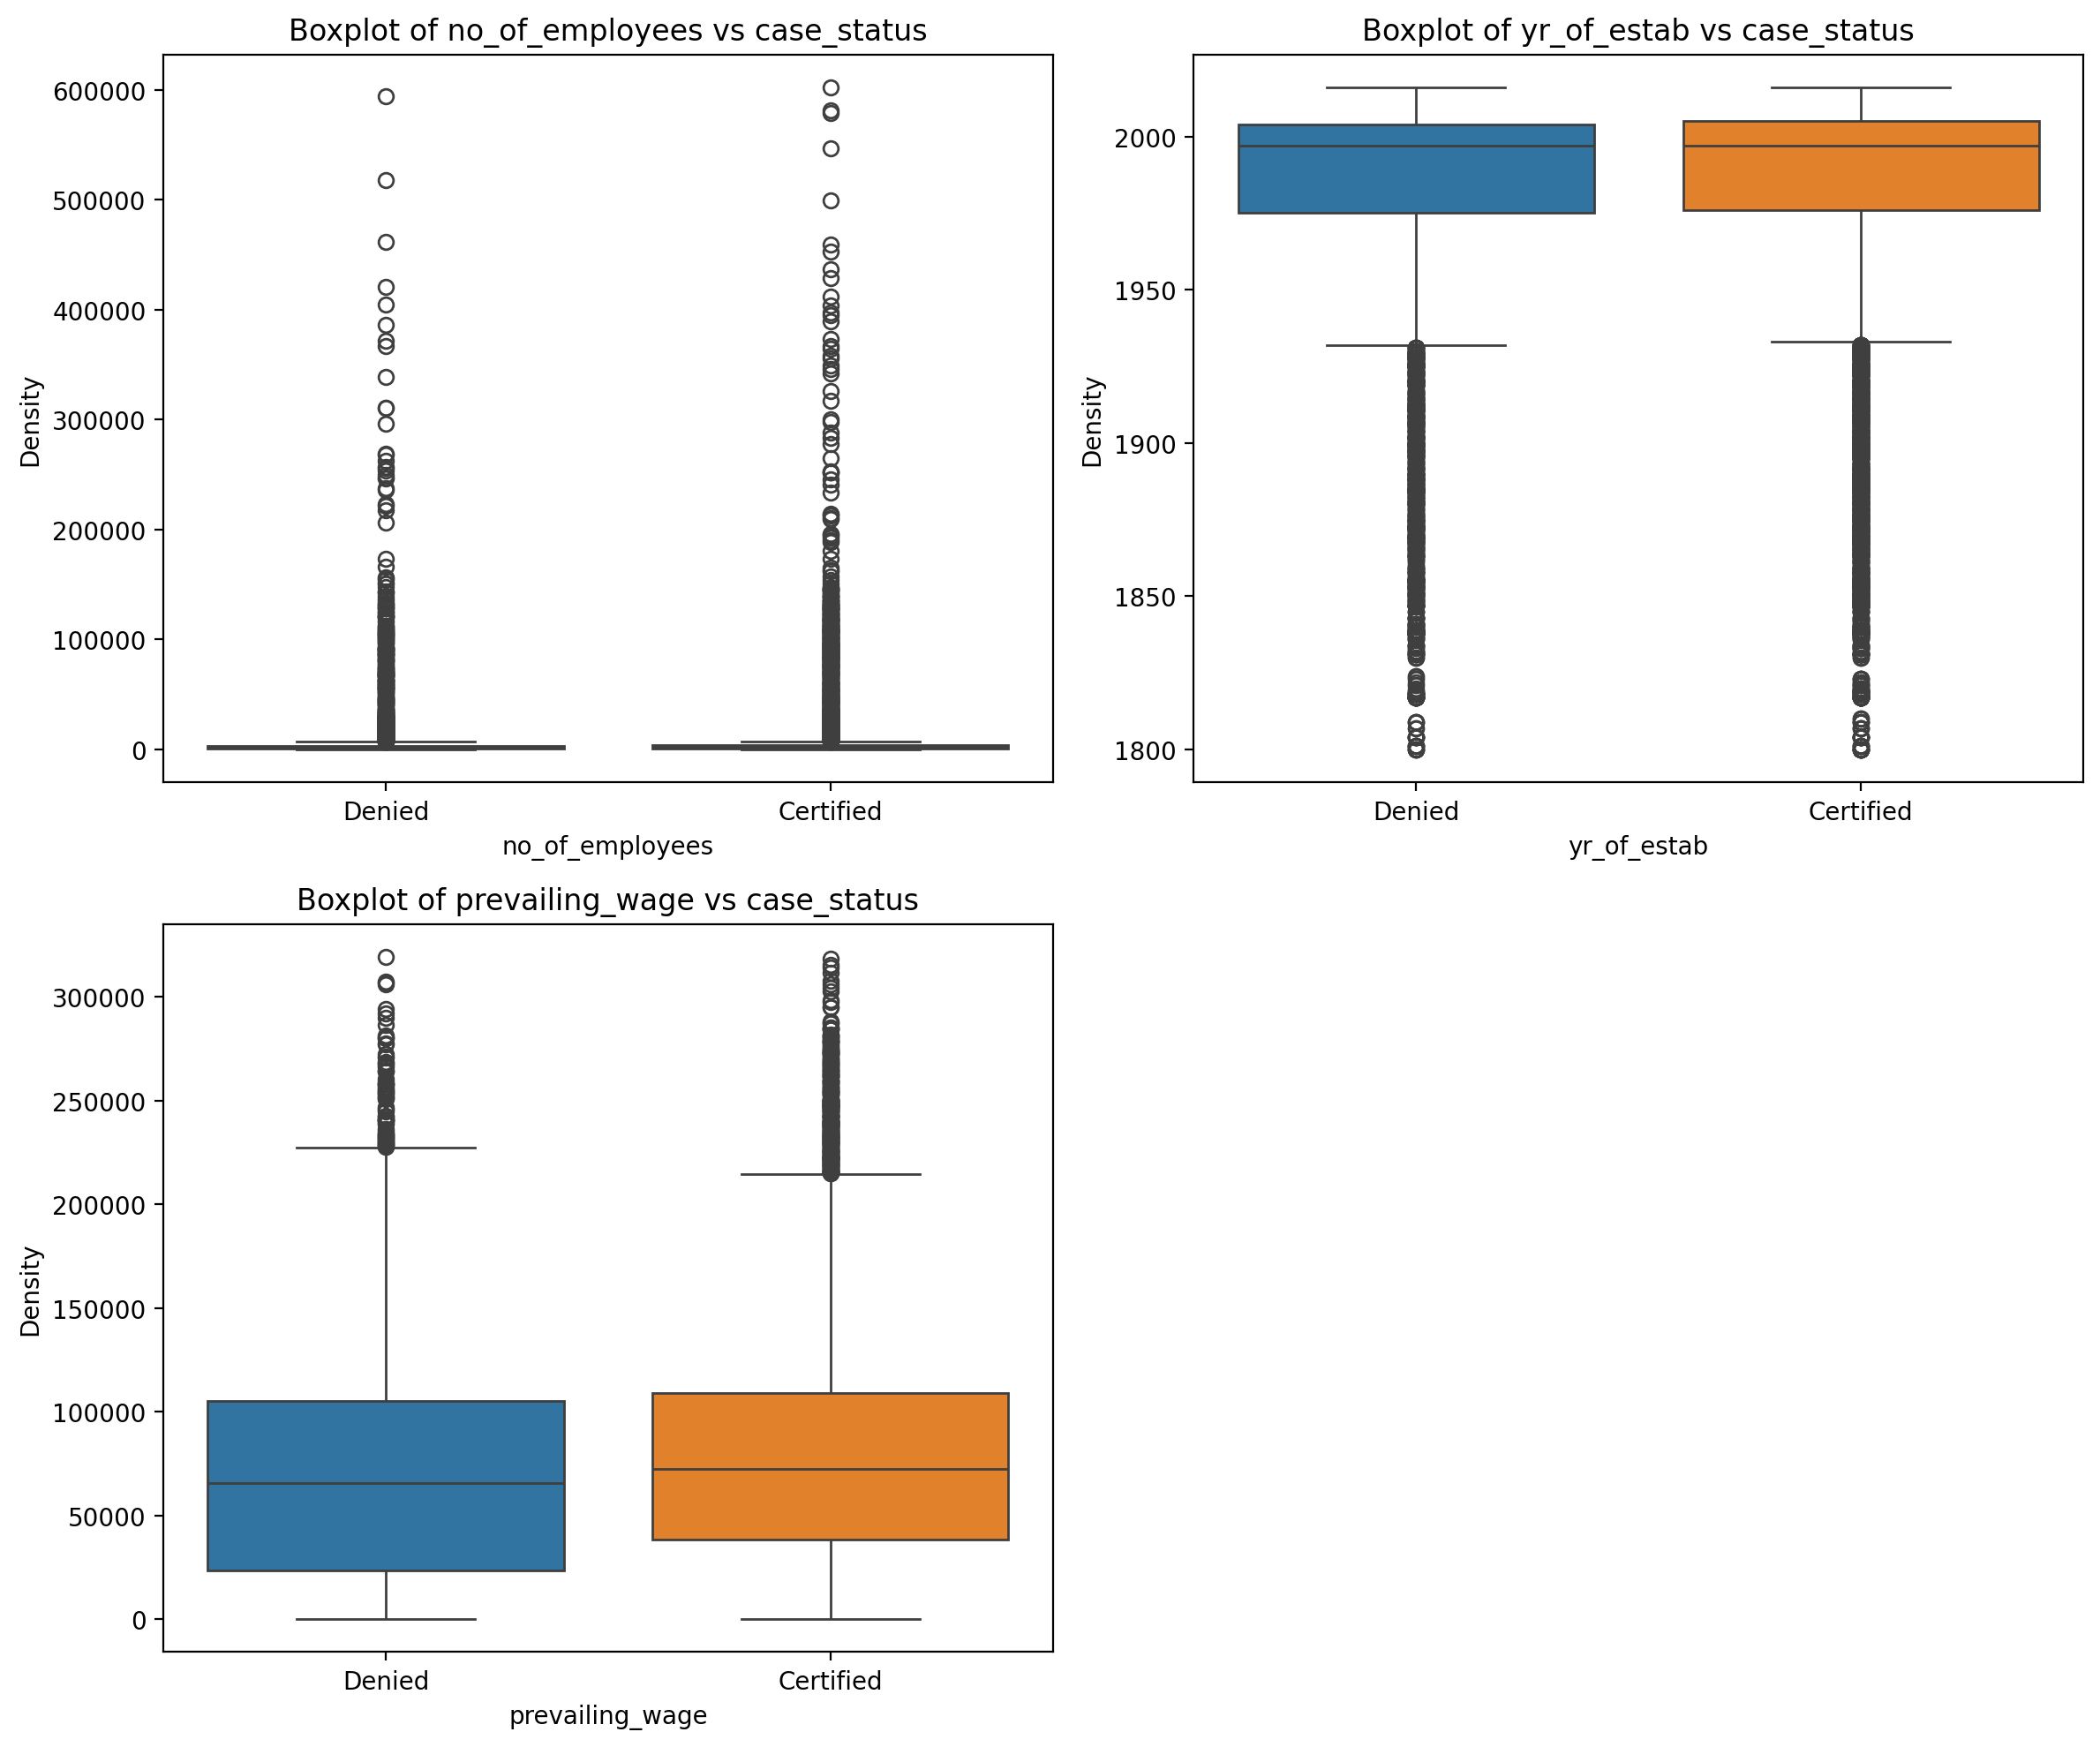

In [25]:
# Numerical vs Categorical
# ------------------------
# case_status vs no_of_employees box plot
bivariate_analyzer.set_strategy(MultiPlotBivariateAnalysis(features=['no_of_employees', 'yr_of_estab', 'prevailing_wage'], plot_type='boxplot'))
bivariate_analyzer.execute_analysis(df, feature_x='', feature_y='case_status', plot_type='boxplot', hue='case_status')

**Reports**

1. Boxplot of `no_of_employees` vs `case_status`

   - Observation:
     - The majority of organizations have a relatively low number of employees (evident from the small interquartile range close to zero).
     - There are numerous outliers representing large organizations (with employee counts reaching up to 600,000).
     - The distribution of the number of employees is similar for both Certified and Denied cases.
   - Insight:
     - The size of an organization (measured by the number of employees) does not appear to be a significant factor in determining visa approval or denial.
     - Outliers suggest that large organizations apply for visas, but their approval rates are similar to smaller organizations.

2. Boxplot of `yr_of_estab` vs `case_status`

   - Observation:

     - The year of establishment of organizations for both Certified and Denied cases has a similar range.
     - The interquartile range (IQR) shows most organizations were established between the mid-1900s and early 2000s.
     - Some outliers correspond to companies established earlier than 1900, indicating a few very old organizations.

   - Insight:
     - The year of establishment of an organization does not appear to influence visa approval or denial.
     - Most companies applying for visas are relatively well-established businesses formed within the last century.

3. Boxplot of `prevailing_wage` vs `case_status`

   - Observation:

     - The `median prevailing wage` is slightly higher for `Certified` cases compared to `Denied` cases.
     - There is a noticeable overlap in the interquartile ranges of prevailing wages for both categories, but the upper quartile of Certified cases is marginally higher.
     - Outliers indicate a few jobs with extremely high wages exceeding $300,000

   - Insight:
     - Higher prevailing wages slightly increase the likelihood of visa certification, but the effect is not strong.
     - Low prevailing wages are common in both Certified and Denied cases, which might indicate that wages alone are not the sole factor in determining visa outcomes.

**Highlighting the Need for Further Analysis:**
Analyze additional variables (e.g, region of employment) for stronger predictive patterns.


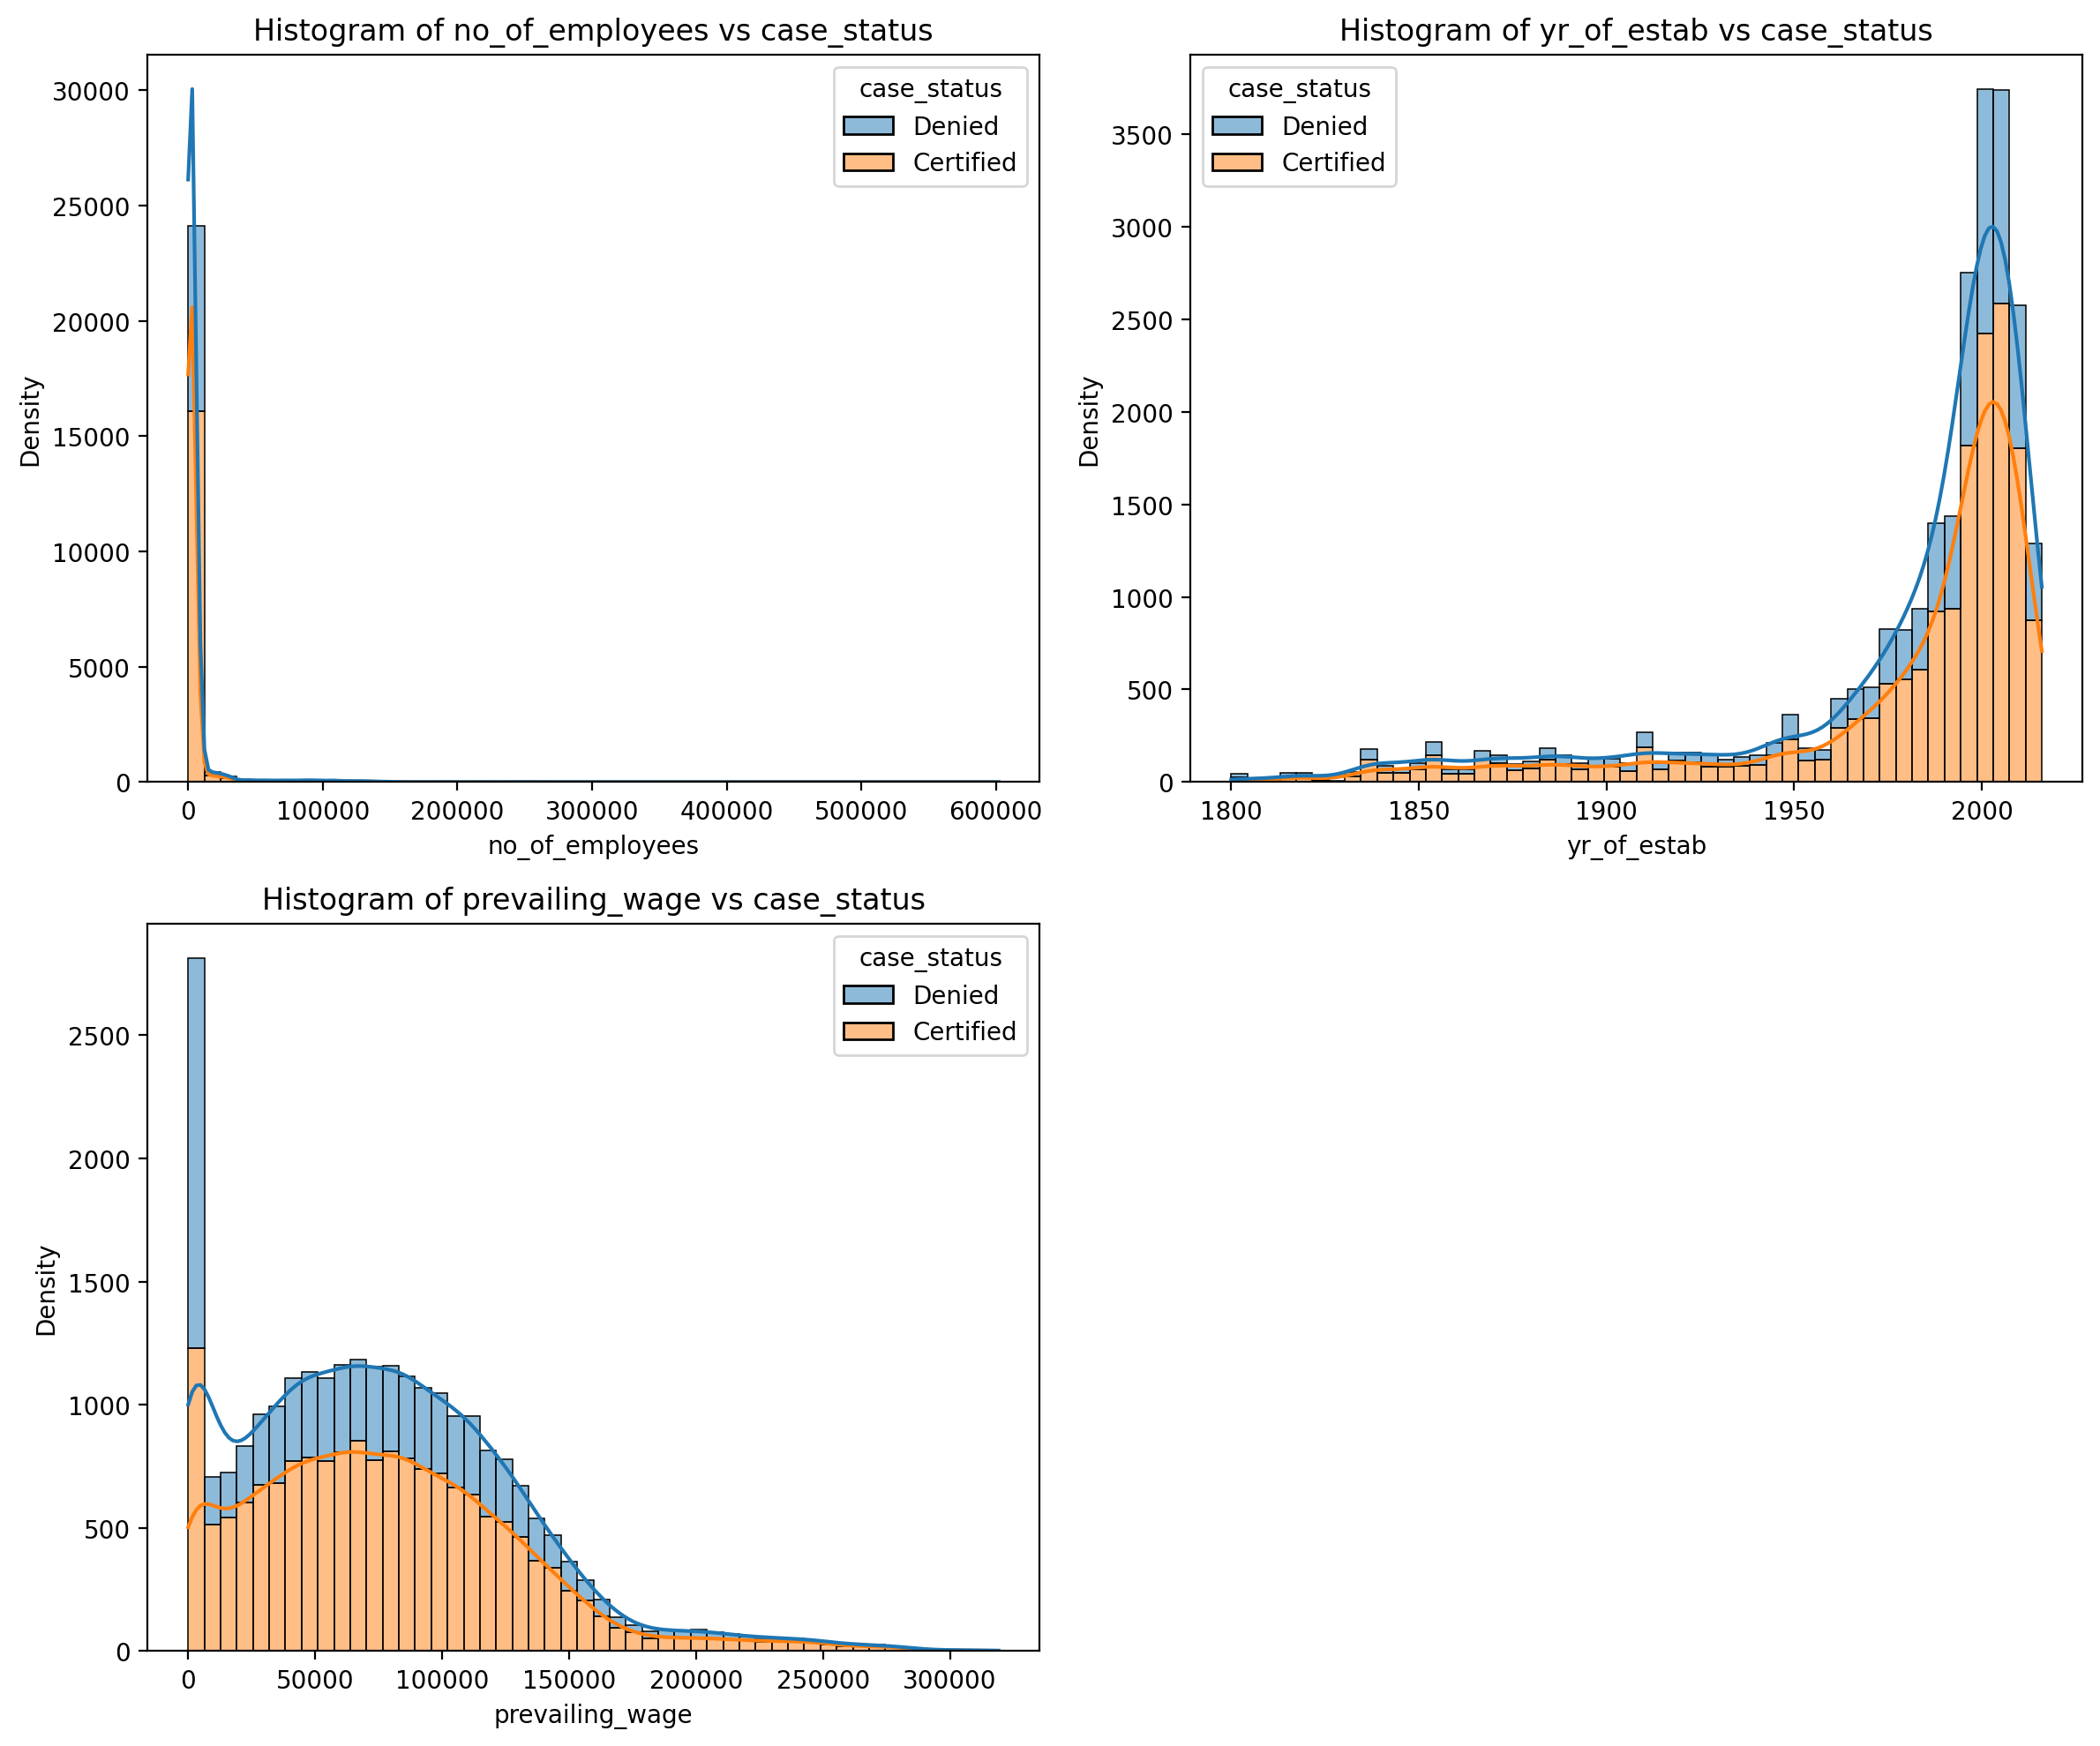

In [26]:
# Numerical vs Categorical
# ------------------------
# case_status vs yr_of_estab
bivariate_analyzer.set_strategy(MultiPlotBivariateAnalysis(features=['no_of_employees', 'yr_of_estab', 'prevailing_wage'], plot_type='histogram'))
bivariate_analyzer.execute_analysis(df, feature_x='', feature_y='case_status', plot_type='histogram', hue='case_status')

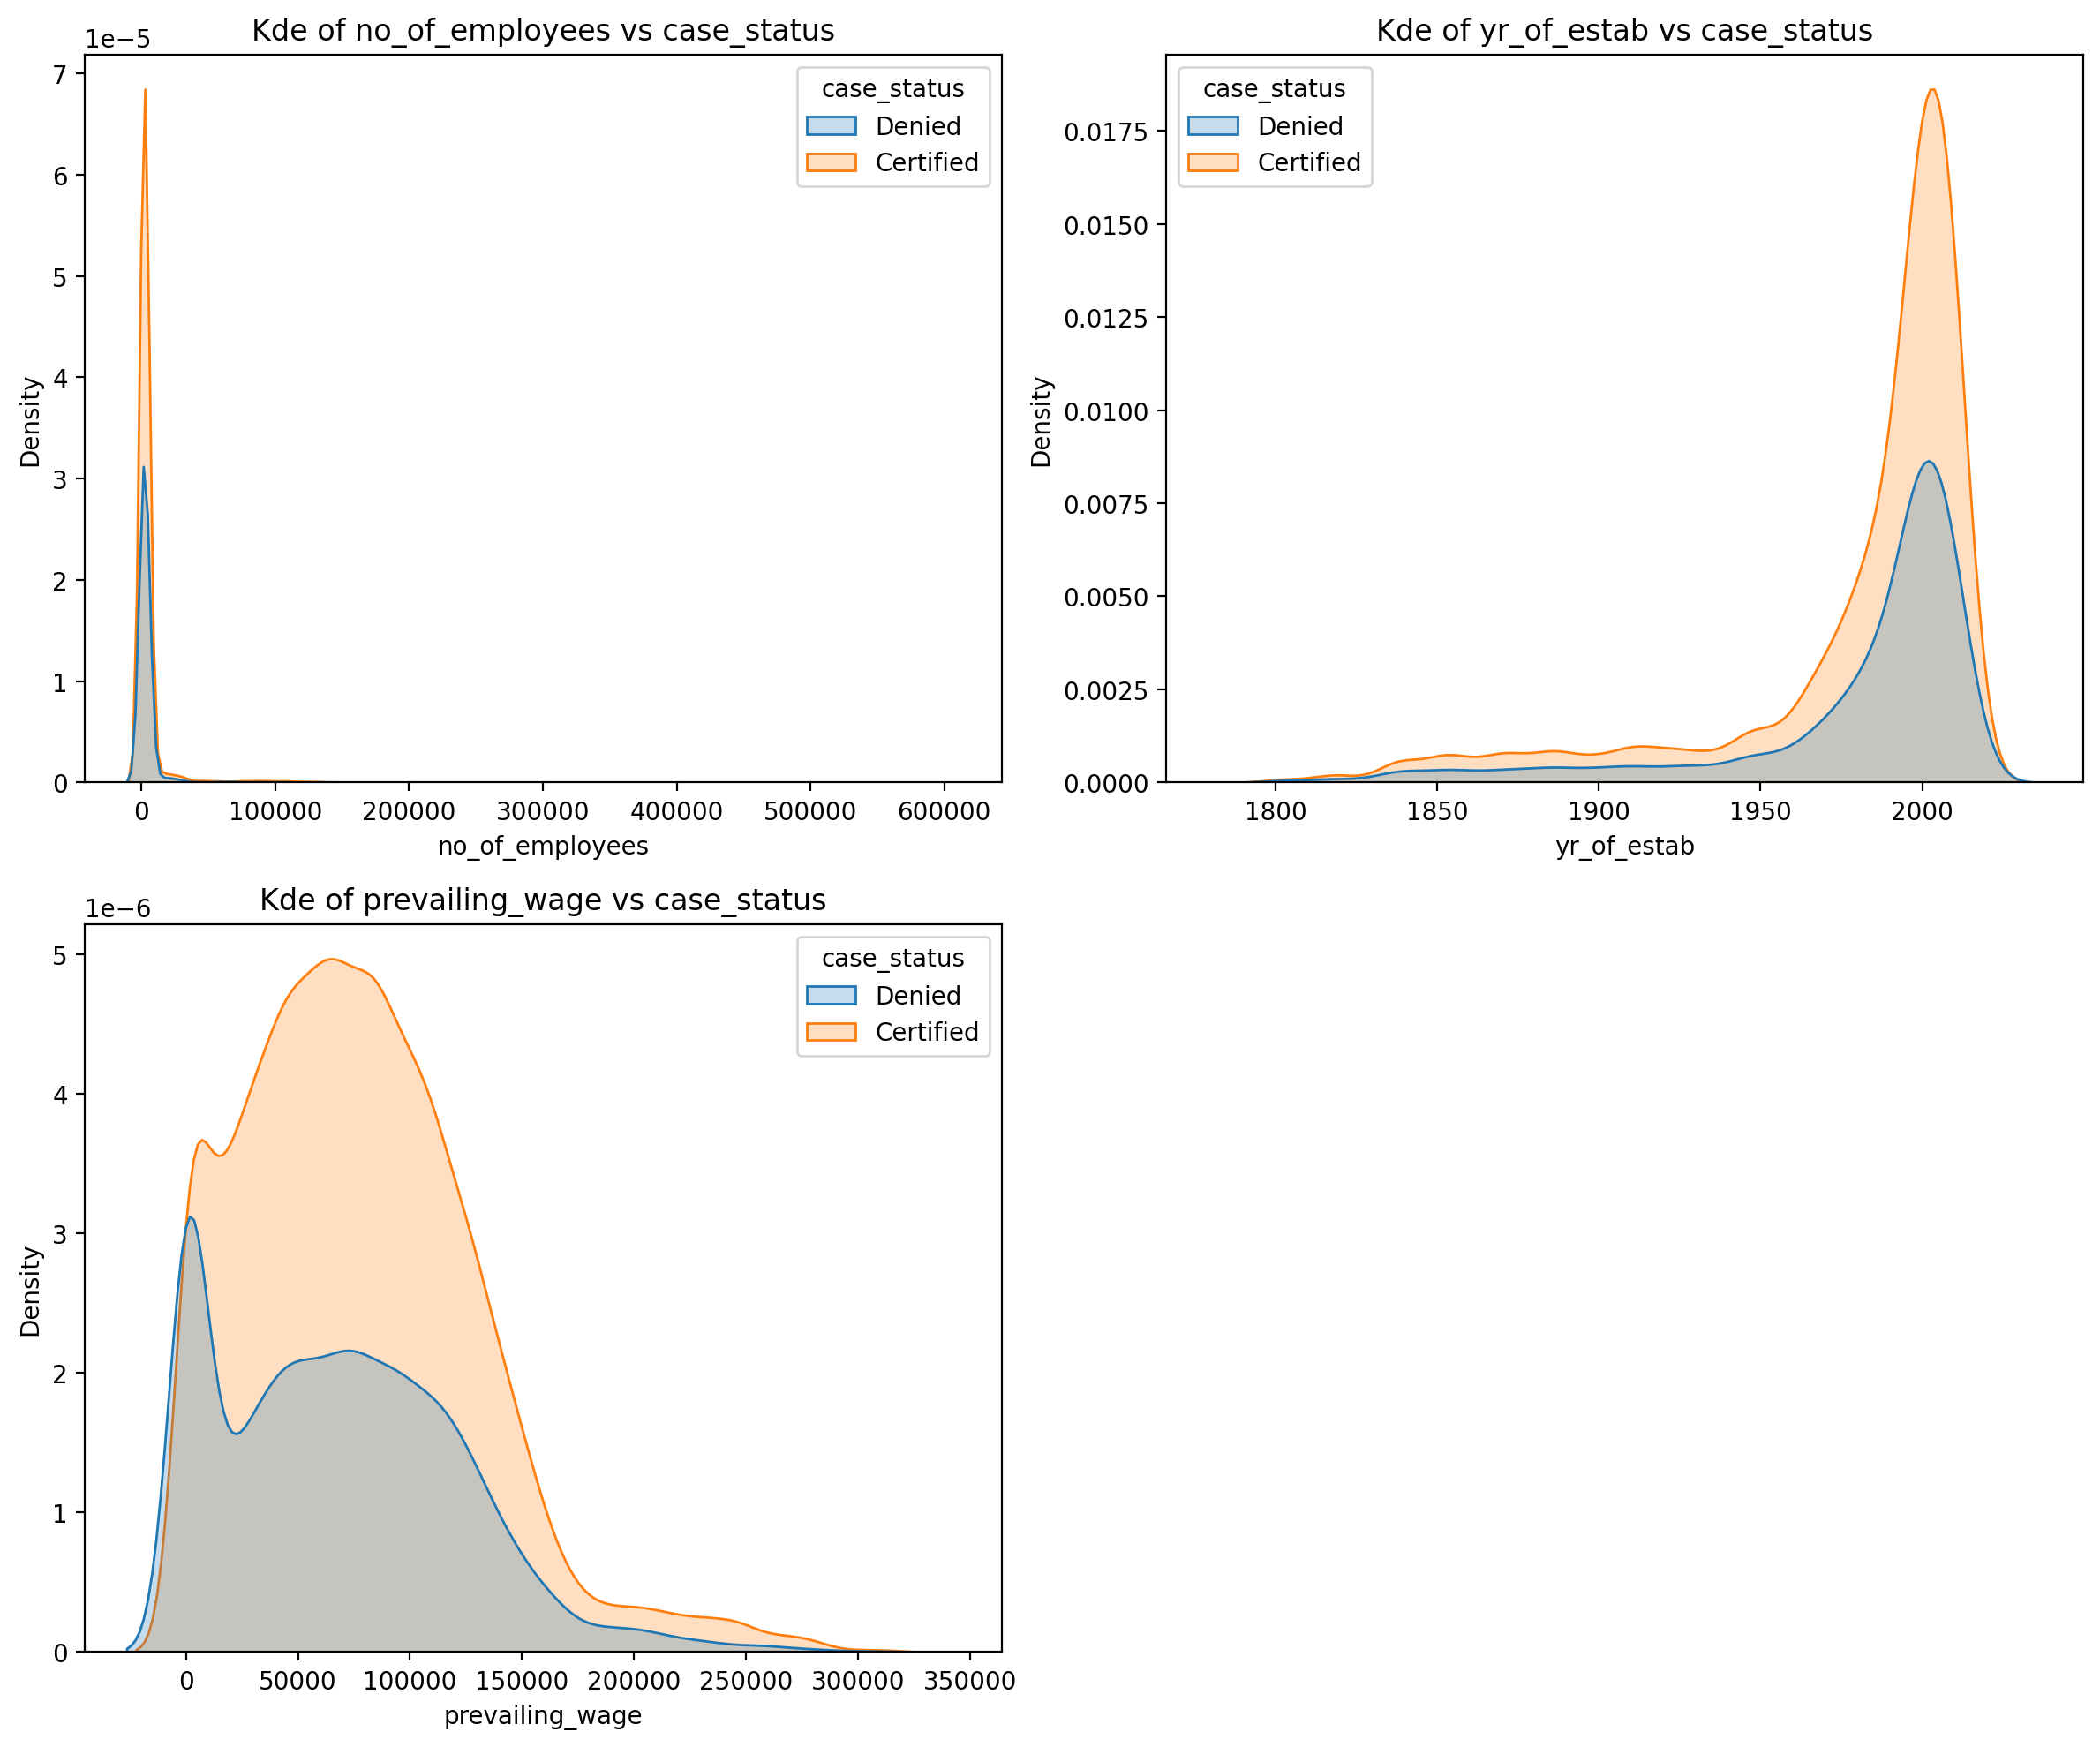

In [27]:
bivariate_analyzer.set_strategy(MultiPlotBivariateAnalysis(features=['no_of_employees', 'yr_of_estab', 'prevailing_wage'], plot_type='kde'))
bivariate_analyzer.execute_analysis(df, feature_x='', feature_y='case_status', plot_type='kde', hue='case_status')

**Insight:**

- Certification likelihood: Companies with fewer employees and lower prevailing wages seem to have higher densities for both Certified and Denied statuses, but certification dominates overall.
- Older companies vs newer companies: Newer companies (established in the late 1900s and beyond) have a higher likelihood of certification.
- Outliers: Extreme values in terms of the number of employees and prevailing wages exist, but their contribution to case densities is minima


**Initial Analysis Report**

- No of Employees has many outliers which can be Handled in Feature Engineering and no_of_employees is Right Skewed.
- yr_of_estab is left skewed and some outliers below the lower bound of Box plot.
- prevailing_wage is right skewed with outliers above upper bound of box plot.
- There are No missing values in the dataset.
- The case_id column can be deleted because each row has unique values.
- The case_status column is the target to predict.
- In the Categorical column, features can be made Binary numerical in feature Encoding


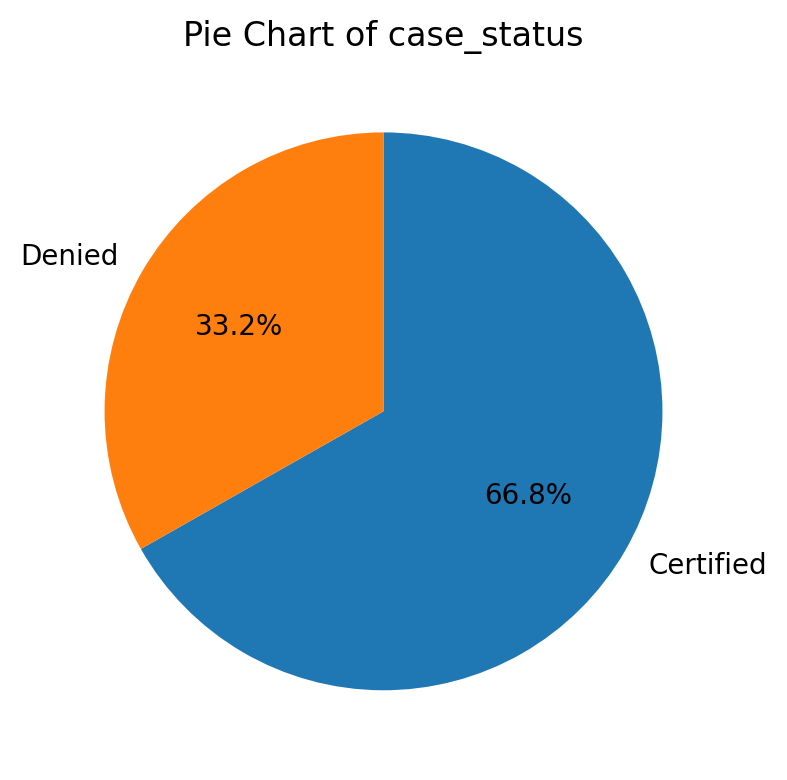

In [28]:
# Proportion of Target feature
# ------------------------
# case_status
univariant_analyzer.execute_analysis(df, feature='case_status', plot_type='pie')

**Insight:**
From the pie chart above it is seen that the Target Variable i.e. `case_status` is Imbalanced.

What is imbalanced data?

- Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Denied value has more count than the Certified value of the dataset.


#### Analysis of each Independent Variable with Dependent/Target Variable in order to see impact of each feature on visa `Certified` or `Denied`.


In [29]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**1. Does applicant `Continent` has any impact on` Visa status`?**


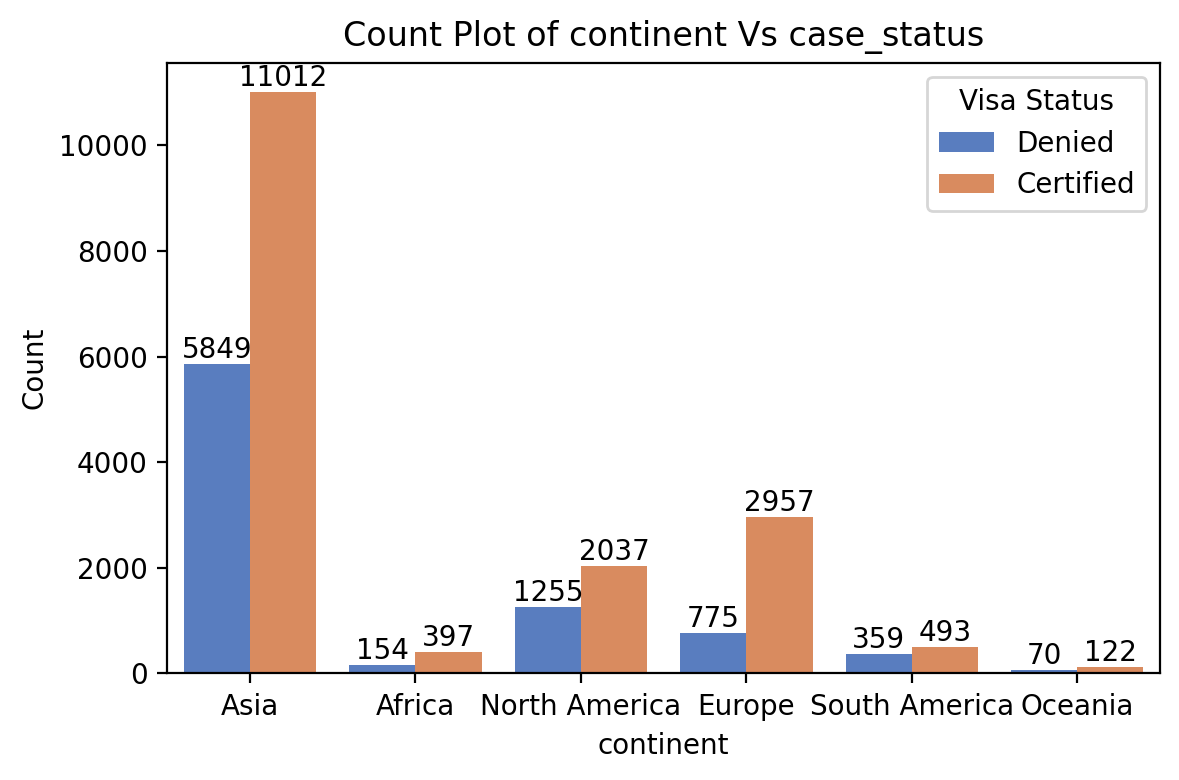

        continent case_status  Percentage
0          Africa   Certified   72.050817
1          Africa      Denied   27.949183
2            Asia   Certified   65.310480
3            Asia      Denied   34.689520
4          Europe   Certified   79.233655
5          Europe      Denied   20.766345
6   North America   Certified   61.877278
7   North America      Denied   38.122722
8         Oceania   Certified   63.541667
9         Oceania      Denied   36.458333
10  South America   Certified   57.863850
11  South America      Denied   42.136150


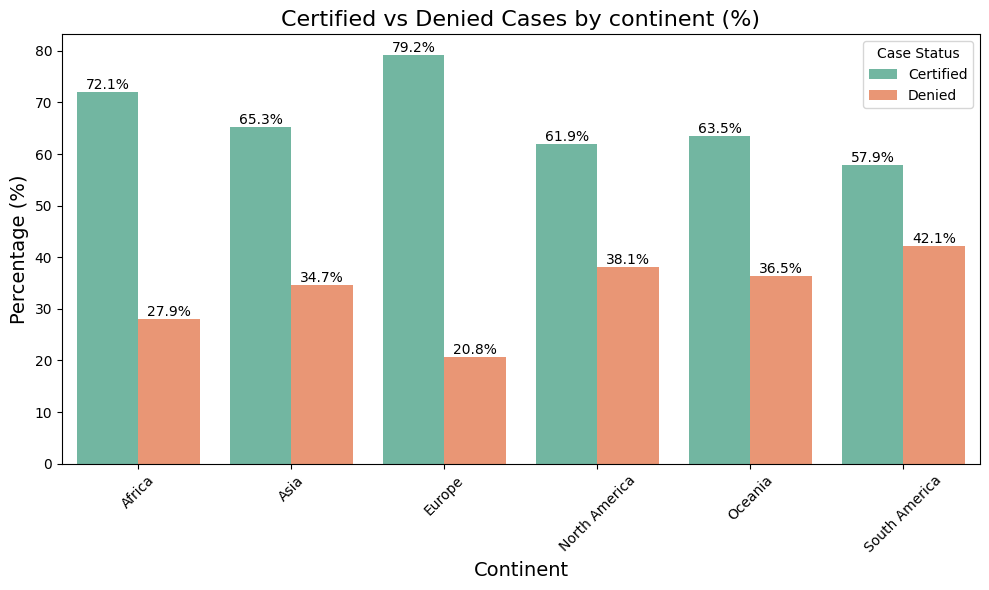

In [ ]:
from analysis_src.independent_vs_dependent_analysis import CategoricalVsCategoricalAnalysis

independent_feature = [col for col in df.columns if col not in ['case_id', 'case_status']]

independent_dependent = CategoricalVsCategoricalAnalysis()
independent_dependent.analyze(df, independent_feature[0], 'case_status')


##### Report

**First Plot (Count Plot of Continent vs Case Status)**

- Asia dominates the count in both "Certified" and "Denied" cases, with a significant number of certifications (11,012) and denials (5,849). This suggests Asia has the highest volume of applications overall.
- Other continents, such as `Africa` and `Oceania`, have much smaller total counts, indicating lower application volumes.
- `Europe`, `North America`, and `South America` show moderate counts, with `Europe` having more certifications compared to others in this group.

**Second Plot (Certified vs Denied Cases by Continent in Percentage)**

- `Europe` has the highest certification rate (79.2%), followed by `Africa` (72.1%). This suggests these continents have a higher likelihood of applications being certified.
- `South America` has the lowest certification rate (57.9%), with 42.1% of applications denied.
- `Oceania`, `North America`, and `Asia` hover between 60-65% certification rates, showing moderate success rates.
- Denial rates are relatively high for `South America (42.1%)` and `North America (38.1%)`, compared to other continents.

**KEY TAKEWAY**

- `Asia leads` in application volume but has a moderate certification percentage (65.3%).
- `Europe stands out` as the most successful region for `certifications` with the highest approval rate.
- `South America` has the highest relative `denial` percentage, which might indicate stricter approval criteria or other barriers in this region.
- `Africa` and `Oceania` have `small` application counts but relatively `high certification `percentages.


### Multivariant Analysis

**The Analysis of more than two variable.**


**Check for Multicollinearity in Numerical feature**


In [31]:
correlation_threshold = 0.8
vif_threshold = 5.0
target_column = 'case_status'

In [32]:
from analysis_src.multicollinearity import *

# Create object for MultiCollinearity Inspection
multicollinearity_inspector = MultiCollinearityInspector()

[ 2024-11-20 15:28:14,804 ] 34 root - INFO - Inspecting numerical collinearity:
[ 2024-11-20 15:28:14,805 ] 132 root - INFO - Entered the separate_numerical_and_categorical method of utils


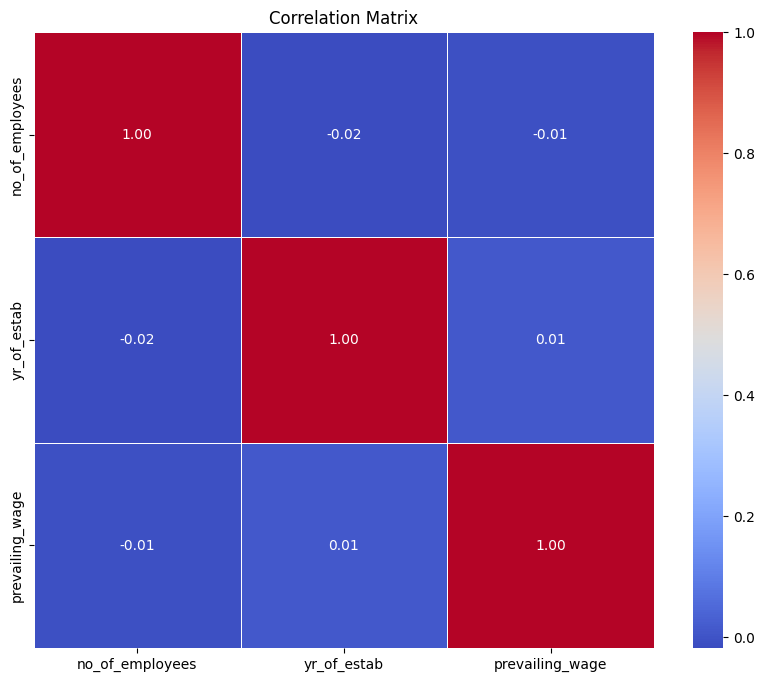

Variance Inflation Factor (VIF):
Empty DataFrame
Columns: [Feature, VIF]
Index: []


(None,
 Empty DataFrame
 Columns: [Feature, VIF]
 Index: [])

In [33]:
multicollinearity_inspector.set_strategy(NumericalMultiCollinearityInspection())
multicollinearity_inspector.execute_inspection(df, correlation_threshold, vif_threshold, target_column)

**Insight**

- There is no any multicollinearity feature in Numerical Column


**Check for Multicollinearity in Categorical feature**


- **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

- **A chi-square statistic is one way to show a relationship between two categorical variables.**

- **Here we test correlation of Categorical columns with Target column i.e case_status**

- Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

- Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)


In [34]:
multicollinearity_inspector.set_strategy(CategoricalMultiCollinearityInspection())
multicollinearity_inspector.execute_inspection(df, correlation_threshold, vif_threshold, target_column)

[ 2024-11-20 15:28:15,113 ] 120 root - INFO - Inspecting categorical collinearity:
[ 2024-11-20 15:28:15,115 ] 132 root - INFO - Entered the separate_numerical_and_categorical method of utils
                  Column               Hypothesis Result
0                case_id  Fail to Reject Null Hypothesis
1              continent          Reject Null Hypothesis
2  education_of_employee          Reject Null Hypothesis
3     has_job_experience          Reject Null Hypothesis
4  requires_job_training  Fail to Reject Null Hypothesis
5   region_of_employment          Reject Null Hypothesis
6           unit_of_wage          Reject Null Hypothesis
7     full_time_position          Reject Null Hypothesis
8            case_status          Reject Null Hypothesis
Features 'case_id' and 'continent' are independent (Chi-square p-value: 0.496)
Features 'case_id' and 'education_of_employee' are independent (Chi-square p-value: 0.496)
Features 'case_id' and 'has_job_experience' are independent (Chi-squ

**Insight**

- Here requires_job_training fails to Rejects Null Hypothesis which means it doesn't correlate with target column.


**Univariate Analysis**

**1. Numerical Features:**

- Histogram - Shows the distribution of the data.
- Box Plot - Identifies outliers and the spread of the data.
- Violin Plot - Combines box plot and density plot features.
- Scatter plots -
- Density Plot - A smooth curve that shows data distribution.
- KDE (Kernel Density Estimate) Plot - Visualizes the probability density function.

**2. Non-Numerical (Categorical) Features:**

- Bar Plot - Shows the frequency of categories.
- Count Plot - Counts of each category.
- Pie Chart - Represents proportions of categories.
- Frequency Table - Displays counts of each category in tabular form.

**Bivariate Analysis**

**1. Numerical vs. Numerical:**

- Scatter Plot - Shows relationships or correlations between two variables.
- Correlation Matrix Plots (Heat Map) -
- Hexbin Plot - Density plot for large datasets; useful for continuous variables.
- Line Plot - Useful for observing trends over time.
- Correlation Matrix with Heatmap - Shows correlations between multiple features.
- Joint Plot - Combines scatter and density plots.

**2. Numerical vs. Non-Numerical:**

- Box Plot - Grouped by category to compare distributions.
- Bar Plot -
- Line Plots -
- Scatterplot -
- Violin Plot - Shows distribution and density for each category.
- Swarm Plot - Displays points on an axis, grouped by category.
- Strip Plot - Similar to swarm plot but without overlapping points.
- Pair Plot -

**3. Non-Numerical vs. Non-Numerical:**

- Stacked Bar Plot - Compares two categorical features.
- Mosaic Plot - Visualizes relationships between two or more categorical variables.
- Grouped Bar Plot - Shows grouped frequency distributions.
- Chi-Square Test Summary Table - Provides statistical insight into categorical relationships.

**Multivariate Analysis**

**Numerical and/or Non-Numerical Features:**

- Pair Plot - Shows pairwise scatter plots between multiple numerical features.
- Heatmap of Correlations - Displays correlation among multiple features.
- 3D Scatter Plot - Plots relationships among three numerical features.
- Parallel Coordinates Plot - Shows multivariate data by plotting each feature as a vertical line.
- Cluster Map - A heatmap with hierarchical clustering to visualize similarity patterns.
- Radar Plot - Displays multivariate data in a radial chart, useful for profile comparisons.
- Bubble Plot - Similar to a scatter plot but adds a third feature as bubble size.
